In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mstda import FeatureSpace
from colour import Color

def make_monotone_map(dd):
    keys = sorted( list(dd))
    return { k : idx for idx,k in enumerate(keys) }

In [2]:
df = pd.read_csv("data/Drugbank_some_descriptors.csv")
descriptor = "Lipinski;lipinski_violations"
#descriptor = "Polarizability"
descriptor = "Mol Weight"
#descriptor = "RAScore;RAscore"
print(descriptor, "NaN values:", len([v for v in df[descriptor].isna() if v]))

Mol Weight NaN values: 0


In [3]:
select = df[descriptor].dropna()
mm = make_monotone_map(pd.unique( select ))
values = select.map(mm)
print({k:v for i,(k,v) in enumerate(mm.items()) if i < 5 },"...", ({k:v for i,(k,v) in enumerate(mm.items()) if i > len(mm.items())-5}))
print(values)

{3.0026032924652: 0, 4.00260210037231: 1, 6.94099998474121: 2, 13.8348197937011: 3, 15.9994001388549: 4} ... {6435.203125: 8566, 7157.0068359375: 8567, 7177.1455078125: 8568, 8272.275390625: 8569}
0        8539
1        8453
2        8532
3        8403
4        8490
         ... 
10627    5821
10628    2055
10629     365
10630    6747
10631    1539
Name: Mol Weight, Length: 10632, dtype: int64


In [4]:
fs = FeatureSpace.load("spaces/persistence_entropy_epsilon0.09.json")
print(fs.molecules[9694])
print(df["SMILES"][7787])

CCOc1ccc(NS(=O)(=O)c2ccc(N)cc2)nn1
CCOc1ccc(NS(=O)(=O)c2ccc(N)cc2)nn1


In [5]:
colors = list(map(
    Color.get_rgb,
    Color("blue").range_to(Color("red"), len(mm))
))
df_smiles = list(df["SMILES"])
idxs = np.asarray(
    [[fs.molecules.index(m),idx] for m in fs.molecules if (idx := df_smiles.index(m)) in values.index ]
)
print(len(idxs))
features = fs.features[idxs[:,0],:]
values = values[idxs[:,1]]
colormap = np.asarray([ colors[i] for i in values ])


9701


<IPython.core.display.Javascript object>


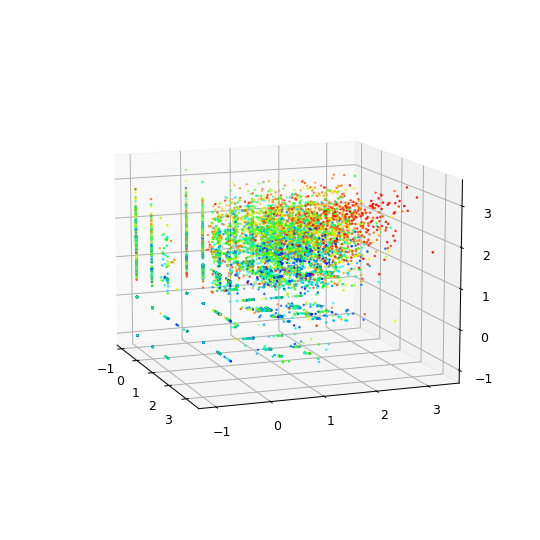

In [6]:
%matplotlib notebook
# homology 0
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(features[:,0],features[:,3],features[:,6], c = colormap, s = 1)
#ax.set_xlabel("energy0")
#ax.set_ylabel("energy1")
#ax.set_zlabel("energy2")